In [1]:
from data import Dataprep
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.utils.data import TensorDataset, Subset, ConcatDataset
from sklearn.model_selection import train_test_split
import time
import random
import numpy as np

/opt/homebrew/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[1460, 297, 1350, 1880, 699, 303, 1343, 306, 307, 821, 1378, 1656, 845, 1792, 1337, 1764, 1332, 1282, 1330, 853, 1533, 815, 1317, 1391, 1309, 1308, 140, 336, 1124, 29, 776, 258, 1835, 900, 965, 1790, 1726, 1148, 711, 596, 208, 1673, 973, 364, 63, 1536, 1665, 1159, 924, 730, 50, 1162, 744, 741, 1695, 1576, 943, 410, 1428, 234, 1908, 1399, 1949, 495, 1404, 697, 446, 1886, 340, 982, 993, 1455, 1798, 474, 1005, 1131, 1910, 1256, 1246, 819, 541, 1012, 783, 1239, 1067, 261, 1164, 1510, 1502, 1557, 1374, 79, 894, 268, 1907, 603, 1603, 994, 1635, 1325]
100


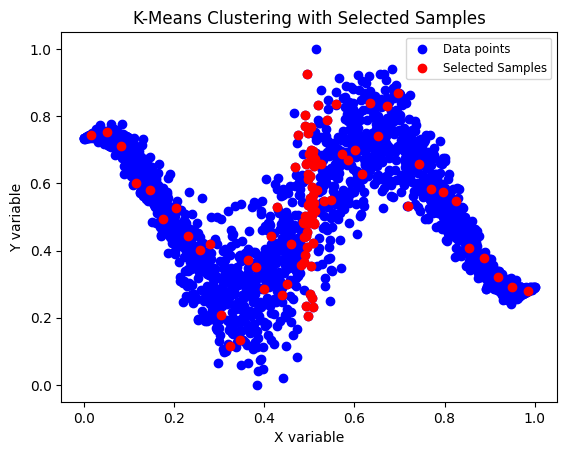

In [2]:
dataset_type = 'Generated_2000'
initial_samplesize = 100

data = Dataprep(dataset_type, initial_samplesize, sensor='') # Load the data
known_data, pool_data = data.known_data, data.pool_data # Save the train and test loaders

In [3]:
validation_size = 0.1
verbose = False
epochs = 5

def train_model():
    # INPUT TRAIN AND VALIDATION DATA
    # OUTPUT TRAINED MODEL
    # PASS TO PREDICTION METHOD THAT RETURNS THE INDICES OF THE NEXT SAMPLES TO BE SELECTED

    train, val = train_test_split(known_data, test_size=validation_size)

    print(known_data.shape)
    print(train.shape, val.shape)

    for epoch in range(epochs):
        if verbose:
            start_epoch = time.time()
            print('Epoch: {} of {}, time-taken: {:.2f} seconds'.format(epoch+1, self.epochs, time.time() - start_epoch))

def select_samples(n): # acquisition function
    selected_indices = random.sample(range(len(pool_data)), n)
    data.next_sample(selected_indices)

In [4]:
train_model()

(100, 2)
(90, 2) (10, 2)


In [5]:
indices = select_samples(10)

[49, 194, 1768, 356, 834, 1617, 410, 1264, 1570, 1216]
(100, 2)
(1900, 2)


In [6]:
pool_df, selected_df, change_df = data.next_sample(indices)

None
(110, 2)
(1890, 2)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

In [13]:
print(data.known_data.shape)
print(data.pool_data.shape)

(100, 2)
(1900, 2)


In [12]:
know_data, pool_data = data.next_sample(selected_indices)
#know_data, pool_data = data.known_data, data.pool_data
print(data.known_data.shape)
print(data.pool_data.shape)

(130, 2)
(870, 2)


In [13]:
known_data.shape

(100, 2)

In [16]:
ds, dl = data.load_data(data.known_data)
len(ds.tensors)

2

In [9]:
pool_df

,0,1
0,0.510511,0.314759
1,7.597598,-0.872701
2,-4.694695,-0.574355
3,2.812813,0.594093
4,-7.437437,0.643612
...,...,...
885,-0.570571,-0.970905
886,-2.172172,0.007767
887,-2.652653,-1.083239
888,-2.352352,-0.664672


In [11]:
change

,0,1
0,-4.094094,-1.163369
1,2.872873,0.341411
2,-4.614615,-1.138598
3,0.570571,0.476627
4,-1.651652,-1.143904
5,6.896897,-0.030243
6,-2.852853,-1.350767
7,-3.053053,-1.501971
8,8.718719,-1.010322
9,-3.973974,-0.895709


In [14]:
np.array_equal(np.array(selected_df.tail(10)), np.array(change))

True

In [8]:
data.pool_data.shape

(1790,)

In [28]:
data.x_selected.shape

(110,)

In [12]:
pool_df.head(10)

,x,y
0,6.916917,-0.526448
1,-5.195195,-0.623636
2,3.313313,0.483551
3,-0.570571,-0.554052
4,0.010010,1.372928
5,1.531532,0.189458
6,1.651652,0.117998
7,9.039039,-0.986414
8,1.251251,0.327997
9,-2.752753,-0.765041


In [13]:
selected_df.tail(10)

,x,y
100,-9.959960,0.965201
101,5.795796,-0.043358
102,-1.691692,-1.567732
103,7.517518,-0.560293
104,9.619620,-0.997390
105,-2.992993,-1.140564
106,-7.117117,0.249315
107,-0.230230,0.174644
108,4.934935,0.664879
109,5.975976,-0.494687


In [14]:
change

,x,y
0,-9.959960,0.965201
1,5.795796,-0.043358
2,-1.691692,-1.567732
3,7.517518,-0.560293
4,9.619620,-0.997390
5,-2.992993,-1.140564
6,-7.117117,0.249315
7,-0.230230,0.174644
8,4.934935,0.664879
9,5.975976,-0.494687


In [20]:
np.array_equal(np.array(selected_df.tail(10)), np.array(change))

True

In [ ]:
print(data.x_selected.shape)
print(data.y_selected.shape)
print(data.x_pool.shape)

(100,)
(100,)
(900,)


In [98]:
pool_dataset_n = np.array(pool_dataset).squeeze()
ds_n = pool_dataset_n[selected_samples]
print(len(pool_dataset_n))
print(ds_n)
pool_dataset_n = np.delete(pool_dataset_n, selected_samples, axis=0)
print(len(pool_dataset_n), len(ds_n))

900
[[ 9.9399395e+00 -9.6709800e-01]
 [ 4.3043044e-01  6.1973608e-01]
 [-2.0320320e+00 -9.3126416e-01]
 [ 6.1061060e-01  7.4274065e-03]
 [-2.5925925e+00 -9.2927104e-01]
 [-3.4334335e+00 -7.8761590e-01]
 [ 6.4764767e+00 -2.5183225e-01]
 [ 6.7567568e+00 -7.4787784e-01]
 [-1.9519520e+00 -2.9226610e-01]
 [ 3.5335336e+00  1.3557800e+00]]
890 10


In [105]:
ds_t = pool_dataset[selected_samples]
print(len(pool_dataset))
indices_to_keep = [idx for idx in range(len(pool_dataset)) if idx not in selected_samples]
pool_dataset_t = Subset(pool_dataset, indices_to_keep)
print(ds_t)
print(len(pool_dataset_t), len(ds_t[0]))

900
(tensor([[ 9.9399],
        [ 0.4304],
        [-2.0320],
        [ 0.6106],
        [-2.5926],
        [-3.4334],
        [ 6.4765],
        [ 6.7568],
        [-1.9520],
        [ 3.5335]]), tensor([[-0.9671],
        [ 0.6197],
        [-0.9313],
        [ 0.0074],
        [-0.9293],
        [-0.7876],
        [-0.2518],
        [-0.7479],
        [-0.2923],
        [ 1.3558]]))
890 10


In [132]:
type(torch.Dataset(ds_t[0]))

NameError: name 'torch' is not defined

In [112]:
np.array_equal(np.array(pool_dataset_t).squeeze(), pool_dataset_n)

True

In [116]:
print(len(known_dataset))
print(len(ConcatDataset([known_dataset, ds_t])))

100
102


In [129]:
len(ds_t.tensors)

AttributeError: 'tuple' object has no attribute 'tensors'

In [124]:
len(known_dataset.tensors)

2

In [127]:
len(known_dataset.tensors[:])

2

In [121]:
len(known_dataset[:][0]), len(known_dataset[0]) 

(100, 2)

In [122]:
known_dataset[:][0][0].shape

torch.Size([1])

In [1]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Example data
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# K-Medoids clustering
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)

# Cluster centers (medoids)
print("Medoids:", kmedoids.cluster_centers_)

# Labels
print("Labels:", kmedoids.labels_)

ModuleNotFoundError: No module named 'sklearn_extra'

In [13]:
from sklearn.cluster import KMeans
import numpy as np

# Sample data
X = np.random.rand(100, 5)  # Replace this with your actual data

# Number of points you want from each cluster
n = 5

# Run KMeans
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Compute distances from each point to its cluster centroid
distances = np.linalg.norm(X - kmeans.cluster_centers_[kmeans.labels_, np.newaxis], axis=2)

# Initialize a list to hold the closest points for each cluster
closest_points_indices = []

# For each cluster, find the n points closest to the centroid
for i in range(k):
    # Get the indices of points in this cluster
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    # Get distances for points in this cluster
    cluster_distances = distances[cluster_indices, i]
    # Get indices of n closest points within this cluster
    closest_indices = np.argsort(cluster_distances)[:n]
    # Store the actual indices relative to the original dataset
    closest_points_indices.append(cluster_indices[closest_indices])

# Now, if you need to retrieve the actual points:
closest_points = [X[indices] for indices in closest_points_indices]

# closest_points is now a list of arrays, where each array contains the n closest points for each cluster


In [14]:
closest_points

[array([[0.94412933, 0.00284423, 0.9416976 , 0.67341518, 0.66888702],
        [0.79853157, 0.00767248, 0.62611778, 0.48665585, 0.18864805],
        [0.65313678, 0.24757283, 0.98972202, 0.08600841, 0.45437553],
        [0.85358787, 0.53982322, 0.89457702, 0.2807614 , 0.67469997],
        [0.45467386, 0.04193957, 0.98721185, 0.09916319, 0.39370766]]),
 array([[0.95169574, 0.89057814, 0.59255918, 0.50691624, 0.27427355],
        [0.60132882, 0.70205531, 0.98251395, 0.4494265 , 0.04934115],
        [0.45584073, 0.55021284, 0.69243546, 0.41624594, 0.52955686],
        [0.48026881, 0.64183135, 0.90773282, 0.52367595, 0.04502738],
        [0.56432574, 0.61713217, 0.91473294, 0.54996342, 0.44179649]]),
 array([[0.80334279, 0.2684269 , 0.39331766, 0.33407867, 0.82732056],
        [0.73598779, 0.67521068, 0.5923844 , 0.43667353, 0.82765271],
        [0.90700107, 0.27219345, 0.9589591 , 0.80535563, 0.91690993],
        [0.86102659, 0.36978799, 0.2244186 , 0.65682101, 0.95052103],
        [0.71841